In [3]:
# coding: utf-8
#
# CS 6204 - Network Science Project - Prof. Cho
# Demetrius Davis (2019) - dldavis@vt.edu
#

import networkx as nx   
import numpy as np
import numpy.random as rd
import scipy.stats
import matplotlib.pyplot as plt
import random
import warnings

In [4]:
# If you are using Jupyter Notebook you may find following two lines useful:
warnings.filterwarnings('ignore')
% matplotlib inline

In [169]:
#
# GRAPH FRAMEWORK
#
class rndGeometricGraphMaker:
    def __init__(self):
        self.G = []
        self.gw_index = 0
        self.lp_index = 0
        self.sorted_indices = []
        self.hp_indices = []
    
    def is_hp_node(self, node_in):
        index = 0
        for node in nx.nodes(self.G):
            if node == node_in and index in self.hp_indices:
                return True
            index += 1

        return False
    
    def isConnected(self):
        return nx.is_connected(self.G)

    def setGWIndex(self, gw_node):
        index = 0
        for node in nx.nodes(self.G):
            if node == gw_node:
                self.gw_index = index
                return
            index += 1

    def selectGWNode(self):
        idx = 0
        for node1 in nx.nodes(self.G):
            found_hp_neighbor = False

            if self.is_hp_node(node1):
                for neighbor_node in nx.neighbors(self.G, node1):
                    if self.is_hp_node(neighbor_node):
                        found_hp_neighbor = True
                if not found_hp_neighbor:
                    self.setGWIndex(node1)
                    return
    
    def buildGraph(self, node_count, r):
        
        # BUILD HOMOGENEOUS POISSON POINT PROCESS
        node_range = r # meters
        field_width = 200 # meters
        target_density = node_count/pow(field_width,2) # lambda
        node_mobility_probability = 0.6

        # Simulate a Poisson point process
        numbPoints = scipy.stats.poisson(node_count).rvs() #Poisson number of points
        print(numbPoints)
        xx = field_width*scipy.stats.uniform.rvs(0,1,((numbPoints,1))) #x coordinates of Poisson points
        yy = field_width*scipy.stats.uniform.rvs(0,1,((numbPoints,1))) #y coordinates of Poisson points

        # Plotting
        plt.scatter(xx,yy, edgecolor='b', facecolor='none', alpha=0.5)
                
        # BUILD IoT NETWORK MODEL - RANDOM GEOMETRIC GRAPH (G)
        pos = {idx: (xx[idx][0], yy[idx][0]) for idx in range(len(xx))}

        self.G = nx.random_geometric_graph(len(pos), node_range, pos=pos)
        self.sorted_indices = nx.convert_node_labels_to_integers(self.G, first_label=1, ordering='decreasing degree', label_attribute=None)
        
        node_count = len(self.G)
        percentage_lp_nodes = 0.2 # percentage of low-performance nodes
        self.lp_index = round(percentage_lp_nodes * node_count) + 1
        sorted_nodes = self.sorted_indices.nodes()

        # Initialize the HP indices list
        node_idx = 0
        for node in sorted_nodes:
            if (node_idx < self.lp_index):
                self.hp_indices.append(node)
            node_idx += 1
        
        # Check to ensure that the graph is sufficiently connected
        self.is_connected = nx.is_connected(self.G)
        print('Is the graph connected? ' + str(self.isConnected()))

        if self.isConnected():
            # Set index of IoT GW node
            self.selectGWNode();
            
            color_map = []
            for index in pos.keys():
                if (index == self.gw_index): # IoT GW
                    color_map.append('yellow')
                elif (index in self.hp_indices): #HP nodes
                    color_map.append('blue')
                else: # LP nodes
                    color_map.append('red')

            nx.draw(self.G, pos, node_size=100, node_color=color_map)
            plt.draw()
            
            print("---POS---")
            print(pos.values())

90
Is the graph connected? True
---POS---
dict_values([(197.50403657219488, 143.80989059577777), (178.61842718618587, 13.334413733464313), (90.69611357508845, 185.56214063328446), (100.06330489139583, 4.189984283804504), (70.67330665700081, 185.68482250006932), (167.0314717953816, 143.50375280752087), (137.32099884588936, 72.30420517024909), (134.5252922614822, 114.37995616326573), (93.07449738524205, 94.89854914801859), (22.58124365317331, 47.4116606580848), (70.59934017286938, 95.14816167647975), (126.68108283703535, 160.45274866141398), (43.87371467807086, 142.22896617546382), (126.19958888417607, 165.79293482900326), (199.53709841831184, 138.01421920560472), (167.30142945616248, 118.0176978634184), (184.02737067375517, 4.46703076119086), (157.84006368997638, 87.80680448839344), (54.68262192202329, 101.08184944938476), (69.15179945363496, 146.2085631492383), (33.671284457562, 84.35407858161024), (44.461370659417824, 117.41525301125282), (32.583140270665226, 102.01618428819694), (43.

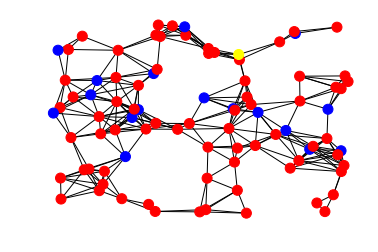

In [170]:
#
# CREATE RANDOM GEOMETRIC GRAPH
#

rgg = rndGeometricGraphMaker()
rgg.buildGraph(75,35)